# Lab 04 - Sampling, Nyquist, Eye Diagrams, PR Signaling

### Maurice Woods

### 17 February 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - Sampling  Theorem,  and  PAM  with  Manchester  and 'RCf' p(t)

In [1]:
from pylab import *
import ecen4652 as ecen
import pamfun
import showfun
import quick
from ascfun import asc2bin

##### Part A) - Build the GRC flowgraph for the visualization of the sampling theorem given in the introduction (f0=2700Hz)

In [2]:
# Thing

Observe the reconstructed ‘CT’ waveform and explain why it does not have a frequency of 2700 Hz

> Cosine Wave; f0 = 1000Hz
> ![1A.1](E1_A_1.png)
>
> Cosine Wave; f0 = 2700Hz
> ![1A.2](E1_A_2.png)
>
> The 

---------------------
##### Part B) - Input a 1000 Hz square wave into the flowgraph of Part A)

In [3]:
# Thing

Does the  reconstructed  ‘CT’  waveform  at  the  output  look  as  expected? Explain! 

> Square Wave; f0 = 1000Hz
> ![1B.1](E1_B_1.png)
> 
> The

Change the frequency of the square wave to 1200 Hz. Explain the reconstructed waveform that you see
using explanations in both the time and frequency domains

> Square Wave; f0 = 1200Hz
> ![1B.2](E1_B_2.png)
>
> The 

-----
##### Part C) - Build  the  GRC  flowgraph  that  uses  a  bandpass  filter  for  the  ‘CT’  waveform  reconstruction

> The
> ![1C.1](E1_C_1.png)
>
> The
> ![1C.2](E1_C_2.png)

Verify that input and output ‘CT’ waveforms are identical.

> The
> ![1C.3](E1_C_3.png)

-----
##### Part D) - Extend the pam10 function in the pamfun module to include the RCf pulse with rolloff parameter α and  truncation  index k and  the manchester or diphase pulse

In [4]:
Fb = 350 # Baud rate (bits/sec)
Fs = 44100 # Sampling frequency (samples/sec)

string="Test"
dn = asc2bin(string,8)
dn = multiply(dn,2)-1

sig_pt = ecen.sigSequ(dn,Fb)

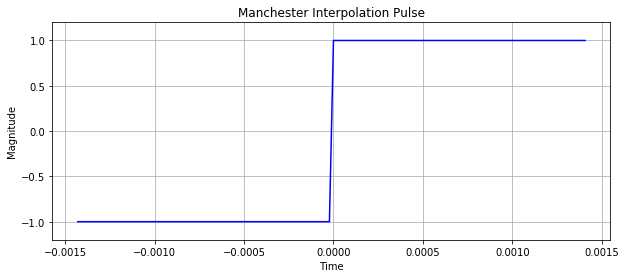

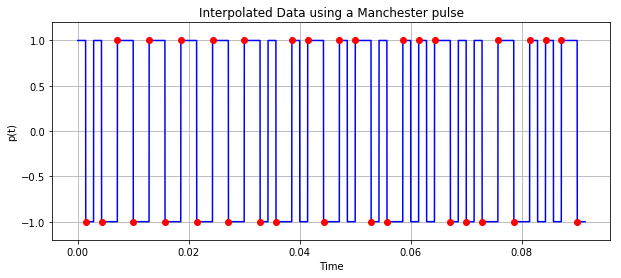

In [5]:
pam_pt = pamfun.pam11(sig_pt,Fs,'man',[])

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab04/pamfun.py:171: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


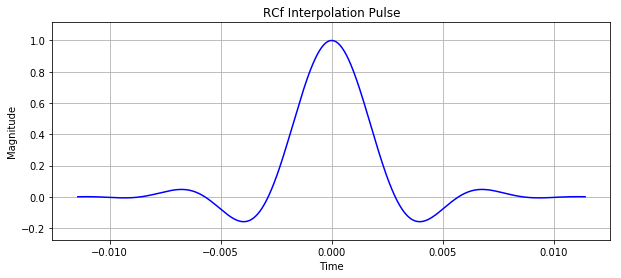

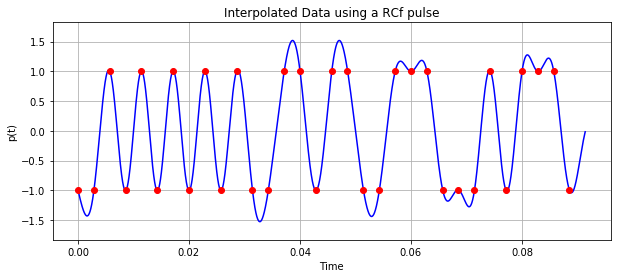

In [6]:
pam_pt = pamfun.pam11(sig_pt,Fs,'rcf',[4,0.4])

-----
##### Part E) -  Generate a  PAM  pulse p(t)  using your pam11 function

Verify that p(t) and P(f) look right for the manchester and the RCf pulses that you added to the pam11 function.

> The

In [7]:
from pylab import *
import ecen4652 as ecen
import pamfun
import showfun

Fs = 44100   #Sampling rate
FB = 350   #Baud rate
N = FB   #Number of symbols
an = hstack((zeros(round(N/2)), 1, zeros(round(N/2)-1)))   #Single pulse, padded with zeros
sig_an = ecen.sigSequ(an, FB, 0)

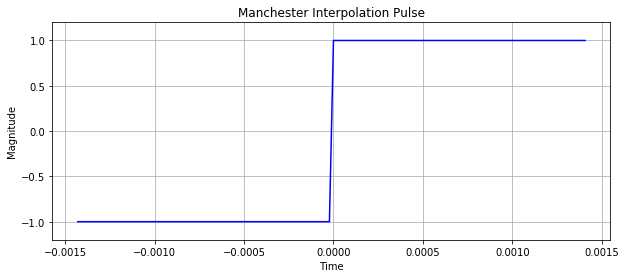

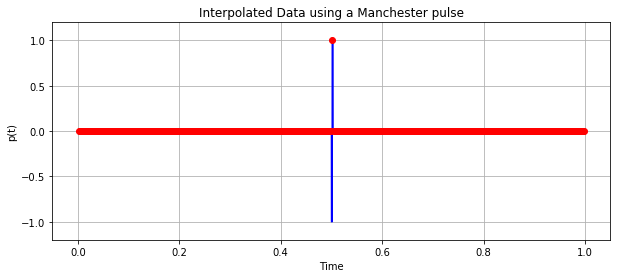

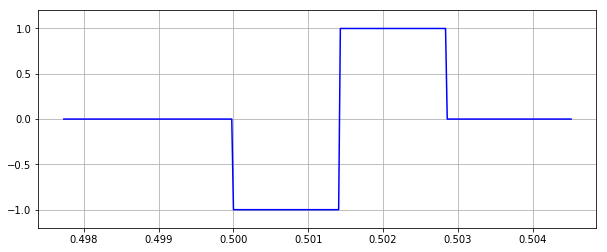

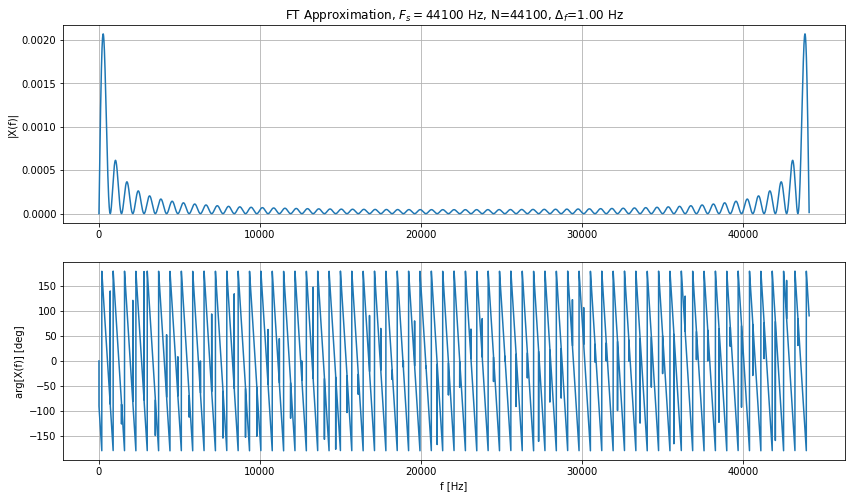

In [10]:
### Manchester Pulse
ptype = 'man'
pparms = []
sig_pt = pamfun.pam11(sig_an,Fs,ptype,pparms) #Generate PAM pulse
sig_pt.set_t0(-(N/2)/float(FB))   #Place center of pulse at t=0

ff_parms = [-600,600,-60] 
showfun.showft(sig_pt,ff_parms) #Plot FT of pulse

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab04/pamfun.py:171: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


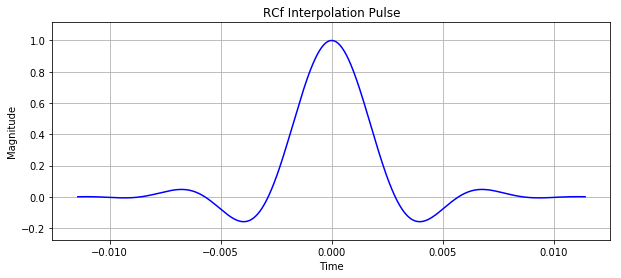

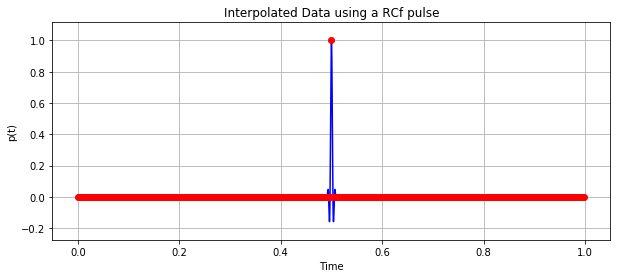

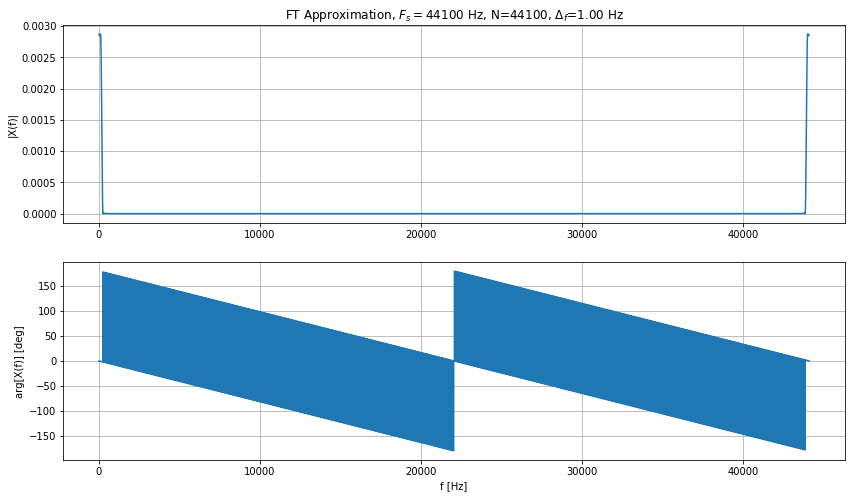

In [11]:
### RCf Pulse
ptype = 'rcf'
pparms = [4,0.4]
sig_pt = pamfun.pam11(sig_an,Fs,ptype,pparms) #Generate PAM pulse
sig_pt.set_t0(-(N/2)/float(FB))   #Place center of pulse at t=0


ff_parms = [-600,600,-60] 
showfun.showft(sig_pt,ff_parms) #Plot FT of pulse

------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 02 -  PAM Analysis with Eye Diagrams

##### Part A) - Write a Python function, called showeye that can be used to display eye diagrams of digital PAM signals

In [ ]:
from pylab import *
import pamfun
import showfun
import ecen4652 as ecen
Fs = 44100                     # Sampling rate
FB = 200                       # Baud rate
NTd = 50                       # Number of traces displayed
N = NTd+10                     # Number of data symbols
L = 4                          # Number of data levels
dly = 0.5                      # Trigger delay TB/2

dn = floor(L*rand(N))          # Unipolar L-level random data
an = 2*dn - (L-1)              # Polar L-level DT sequence
sig_an = ecen.sigSequ(an,FB)
antt = quick.quicktt(sig_an.sig,FB)

intrp_an = pamfun.pam10(sig_an,Fs,'sinc', [3, 4])# int(Fs/FB)]) # PAM signal, ’sinc’ p(t)
intrp_antt = quick.quicktt(intrp_an.sig,intrp_an.Fs)

quick.quickplot(intrp_antt,intrp_an.sig,'b',antt,sig_an.sig,'or',"Random 4-Level Sequence [red 'o'] and 4x 'sinc' Interpolation [blue-]",'Time (s)', 'Data Level',15,6)

wave_an = ecen.sigWave(intrp_an.sig, intrp_an.Fs, 0)
showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

##### Part B) -  Find out as much as possible about the pamsig401.wav and pamsig402.wav PAM signals.  In particular, try to find FB, p(t), and the number of levels L.  Also, try to characterize channel impairments (if any) like ISI, noise, and timing jitter

In [ ]:
from wavfun import wavread
[seq, framerate] = wavread("pamsig401.wav")

Fs=framerate

seqtt = quick.quicktt(seq,Fs)
quick.quickplot(seqtt[0:5000],seq[0:5000],'-b',[],[],'','','','',15,8)


> This waveform appears to have a baud rate of ~1bit/0.002sec and looks binary.

> If we search around this value by manually tweeking FB, we find...

In [ ]:
wave_an = ecen.sigWave(seq, Fs, 0)

### Make an array of FBs over which we can 'scan' for a good eye diagram
#FBden=arange(0.0015,0.0035,0.00001)
#FBnum=ones(len(FBden))
#FB=divide(FBnum,FBden)
#showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])
#sshowfun.showft_plusplus(wave_an,[-2000, 2000, -60])

FB=359.712230216
showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])
showfun.showft_plusplus(wave_an,[-2000, 2000, -60])

> There are no GREAT eye diagrams produced from any reasonable FB precision. The BEST eye diagram found to 0.00001Hz precision is FB=359.712230216bps. With the eye diagram (shown above), we confirm that the data appears to only use two levels (binary) and seems to suffer some time jitter (as evidenced by what appears to be a horizontal shift in some traces).

In [ ]:
[seq, framerate] = wavread("pamsig402.wav")

Fs=framerate

seqtt = quick.quicktt(seq,Fs)
quick.quickplot(seqtt[0:10000],seq[0:10000],'-b',[],[],'','','','',15,8)

> The waveform appears to have a baudrate of ~10bit/0.05sec and appears to use at least 5 data levels

> If we search around this FB by tweeking the value manually...

In [ ]:
wave_an = ecen.sigWave(seq, Fs, 0)
FB=10/0.0475
showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])
showfun.showft_plusplus(wave_an,[-200, 200, -60])

##### Part C) - Use scipy.signal.butter  to  compute the numerator and the denominator polynomial coefficients of the rational transfer function H(z) of an N-th order DT Butterworth filter

What can you conclude for the channel bandwidth that is needed for reliable detection of the transmitted data? 

> The

Look at the eye diagram below that was obtained using the GNU Radio flowgraph of this experiment.  Can you determine the N and the fL that was used for the Butterworth filter?

> The